In [96]:
import numpy as np

def convert_to_local_system(utm_points, origin_point, angle_rad):
    # Convert list of points to numpy array for vectorized operations
    utm_array = np.array(utm_points)
    
    # Step 1: Translate all points based on the new origin
    translated_points = utm_array - origin_point
    
    # Step 2: Create rotation matrix for counter-clockwise rotation
    # Note: Adjust the angle if necessary based on the actual orientation
    rotation_matrix = np.array([[np.cos(angle_rad), -np.sin(angle_rad)], 
                                [np.sin(angle_rad),  np.cos(angle_rad)]])
    
    # Step 3: Apply rotation to all points
    rotated_points = np.dot(translated_points, rotation_matrix)

    return rotated_points

# Define your UTM points here
utm_points = [
    [571669.830, 4925261.846],  # Point 1
    [572906.372, 4923428.598],  # Point 2 (This will be the origin)
    [574739.620, 4924665.140],  # Point 3
    [573503.079, 4926498.388]   # Point 4
]

# Define the origin of the new local system (Point 2)
origin_point = np.array([572906.372, 4923428.598])

# Calculate rotation angle based on orientation from Point 2 to Point 1
# Assuming Point 2 to Point 1 is the positive y-direction
dx = 571669.830 - 572906.372  # Change in x
dy = 4925261.846 - 4923428.598  # Change in y
angle_rad = np.arctan2(dy, dx)  # Calculate the angle in radians

# Convert points
local_points = convert_to_local_system(utm_points, origin_point, angle_rad)

# Print the local coordinates
for i, point in enumerate(local_points, 1):
    print(f"Point {i} in local coordinates: {point}")


Point 1 in local coordinates: [ 2.21129698e+03 -3.52144236e-13]
Point 2 in local coordinates: [0. 0.]
Point 3 in local coordinates: [-6.78165678e-10 -2.21129698e+03]
Point 4 in local coordinates: [ 2211.29642386 -2211.29781209]


In [117]:
import numpy as np

def convert_to_local_system(utm_points, origin_point, northing_angle, easting_angle):
    utm_array = np.array(utm_points)
    translated_points = utm_array - origin_point
    
    # Calculate the necessary rotation to align the axes
    # Ensure that the Easting direction is aligned along the x-axis and Northing along y-axis
    rotation_angle = easting_angle - np.pi/2  # Aligning Easting to x-axis

    rotation_matrix = np.array([[np.cos(rotation_angle), -np.sin(rotation_angle)], 
                                [np.sin(rotation_angle),  np.cos(rotation_angle)]])
    
    rotated_points = np.dot(translated_points, rotation_matrix)
    
    return rotated_points

# Define your UTM points here
utm_points = [
    [571669.830, 4925261.846],  # Point 1
    [572906.372, 4923428.598],  # Point 2 (This will be the origin)
    [574739.620, 4924665.140],  # Point 3
    [573503.079, 4926498.388]   # Point 4
]

# Define the origin of the new local system (Point 2)
origin_point = np.array([572906.372, 4923428.598])

# Calculate rotation angles for the Northing and Easting directions
# Northing (Point 2 to Point 1)
dx_northing = 571669.830 - 572906.372
dy_northing = 4925261.846 - 4923428.598
northing_angle = np.arctan2(dy_northing, dx_northing)

# Easting (Point 2 to Point 3)
dx_easting = 574739.620 - 572906.372
dy_easting = 4924665.140 - 4923428.598
easting_angle = np.arctan2(dy_easting, dx_easting) +np.pi/2

# Convert points
local_points = convert_to_local_system(utm_points, origin_point, northing_angle, easting_angle)

# Print the local coordinates
for i, point in enumerate(local_points, 1):
    print(f"Point {i} in local coordinates: {point}")


Point 1 in local coordinates: [-6.78077964e-10  2.21129698e+03]
Point 2 in local coordinates: [0. 0.]
Point 3 in local coordinates: [2.21129698e+03 1.91018204e-13]
Point 4 in local coordinates: [2211.29781209 2211.29642386]


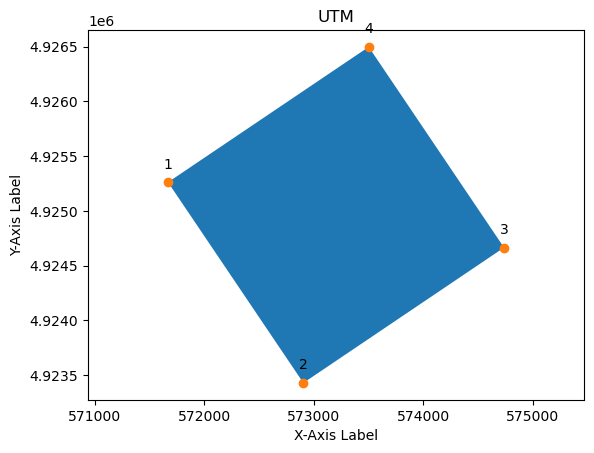

In [118]:
import matplotlib.pyplot as plt

xs = [n[0] for n in utm_points]
ys = [n[1] for n in utm_points]
labels = ['1', '2', '3', '4']

plt.fill(xs, ys)
plt.scatter(xs, ys)
plt.axis('equal')  # Set equal aspect ratio for x and y axes

plt.xlabel('X-Axis Label')
plt.ylabel('Y-Axis Label')

# Add labels for each point
for i, label in enumerate(labels):
    plt.annotate(label, (xs[i], ys[i]), textcoords="offset points", xytext=(0, 10), ha='center')


plt.title('UTM')
plt.show()


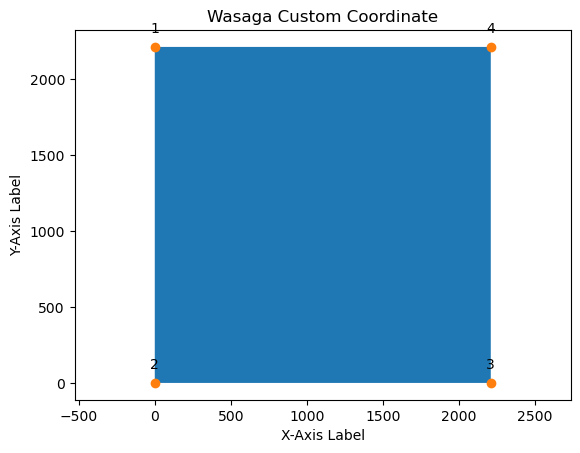

In [119]:
import matplotlib.pyplot as plt

xs = [n[0] for n in local_points]
ys = [n[1] for n in local_points]
labels = ['1', '2', '3', '4']

plt.fill(xs, ys)
plt.scatter(xs, ys)
plt.axis('equal')  # Set equal aspect ratio for x and y axes

plt.xlabel('X-Axis Label')
plt.ylabel('Y-Axis Label')

# Add labels for each point
for i, label in enumerate(labels):
    plt.annotate(label, (xs[i], ys[i]), textcoords="offset points", xytext=(0, 10), ha='center')


plt.title('Wasaga Custom Coordinate')
plt.show()


In [120]:
import numpy as np
import pandas as pd

In [121]:
# Read CSV data
df = pd.read_csv("septics_coordinates.csv")  # Ensure the file path is correct

# Extract UTM coordinates
utm_points = df[['UTM Easting', 'UTM Northing']].values

# Define the origin of the Wasaga Coordinate System (presumably Point 2)
origin_point = np.array([572906.372, 4923428.598])  # Replace with actual origin coordinates

# Define angles for the Wasaga Coordinate System based on Point 1 and Point 3's UTM coordinates
# [Use the previously calculated angles or recalculate if necessary]

# Convert UTM coordinates to Wasaga Coordinates
wasaga_points = convert_to_local_system(utm_points, origin_point, northing_angle, easting_angle)

# Add the converted coordinates back to the dataframe
df['Wasaga Easting'] = wasaga_points[:, 0]
df['Wasaga Northing'] = wasaga_points[:, 1]

# Print or save the updated dataframe
print(df.head())  # or df.to_csv('converted_coordinates.csv', index=False)


                 Name    UTM Easting  UTM Northing  Year  Wasaga Easting   
0  Untitled Placemark  572149.205330  4.924782e+06  1978      129.054694  \
1  Untitled Placemark  572247.092236  4.924821e+06  1978      232.190267   
2  Untitled Placemark  572200.562035  4.924800e+06  1978      182.001705   
3  Untitled Placemark  572164.930419  4.924788e+06  1978      145.645655   
4  Untitled Placemark  572131.084305  4.924774e+06  1978      109.518697   

   Wasaga Northing  
0      1545.365732  
1      1523.220153  
2      1532.022130  
3      1541.841795  
4      1548.808106  


In [122]:
df

,Name,UTM Easting,UTM Northing,Year,Wasaga Easting,Wasaga Northing
0,Untitled Placemark,572149.205330,4.924782e+06,1978,129.054694,1545.365732
1,Untitled Placemark,572247.092236,4.924821e+06,1978,232.190267,1523.220153
2,Untitled Placemark,572200.562035,4.924800e+06,1978,182.001705,1532.022130
3,Untitled Placemark,572164.930419,4.924788e+06,1978,145.645655,1541.841795
4,Untitled Placemark,572131.084305,4.924774e+06,1978,109.518697,1548.808106
...,...,...,...,...,...,...
830,Untitled Placemark,573296.968157,4.923963e+06,2008,622.728314,224.732628
831,Untitled Placemark,573336.874240,4.923974e+06,2008,661.655420,211.080715
832,Untitled Placemark,573365.399797,4.923987e+06,2008,693.041296,206.600171
833,Untitled Placemark,573535.912004,4.924010e+06,2008,846.786657,129.611475


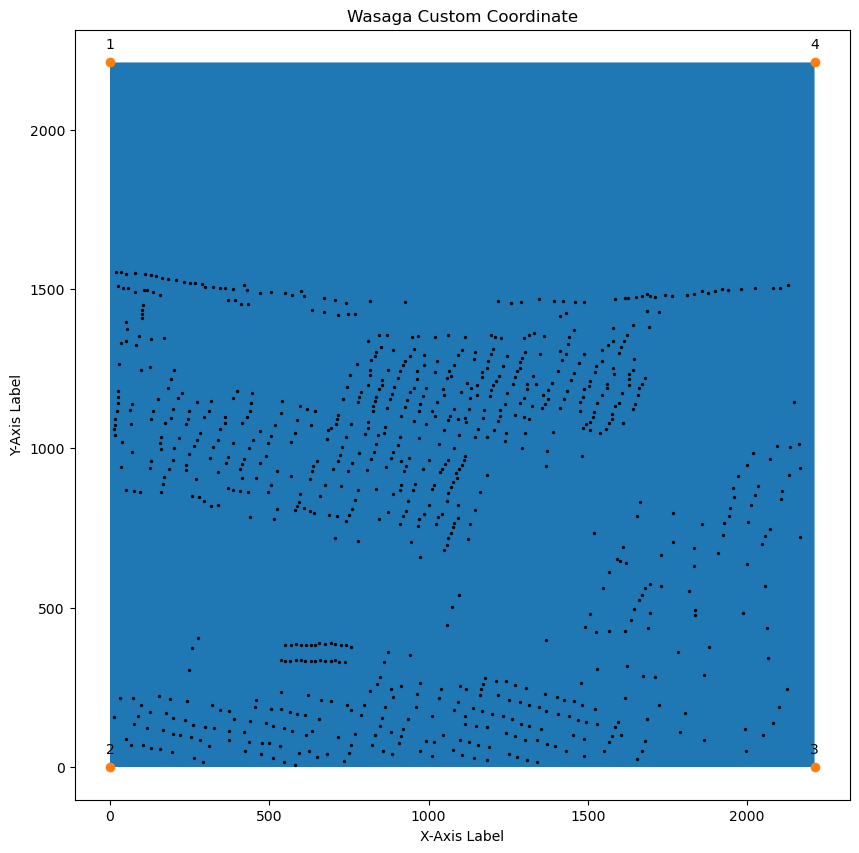

In [135]:
import matplotlib.pyplot as plt

# Extract x and y coordinates for the model domain from 'local_points'
model_domain_xs = [n[0] for n in local_points]
model_domain_ys = [n[1] for n in local_points]

# Define labels for data points within the model domain
model_domain_labels = ['1', '2', '3', '4']

# Create a filled polygon and scatter plot of the model domain
plt.fill(model_domain_xs, model_domain_ys)
plt.scatter(model_domain_xs, model_domain_ys)

# Set an equal aspect ratio for x and y axes
plt.axis('equal')

# Set labels for the X and Y axes
plt.xlabel('X-Axis Label')
plt.ylabel('Y-Axis Label')

# Add labels for each data point within the model domain with a slight offset above each point
for i, label in enumerate(model_domain_labels):
    plt.annotate(label, (model_domain_xs[i], model_domain_ys[i]), textcoords="offset points", xytext=(0, 10), ha='center')

# Extract x and y coordinates for septic points from the 'df' DataFrame
septic_xs = df['Wasaga Easting']
septic_ys = df['Wasaga Northing']

# Create a scatter plot of the septic points
plt.scatter(septic_xs, septic_ys, s=2,c='k')



plt.gcf().set_size_inches(10,10)
plt.title('Wasaga Custom Coordinate')
plt.show()


# Export

In [136]:
df['Wasaga Easting'] = df['Wasaga Easting']/2211.3*2200 # normalization
df['Wasaga Northing']= df['Wasaga Northing']/2211.3*2200 # normalization

In [139]:
df.to_csv('septics_transformed.csv')

<Axes: >

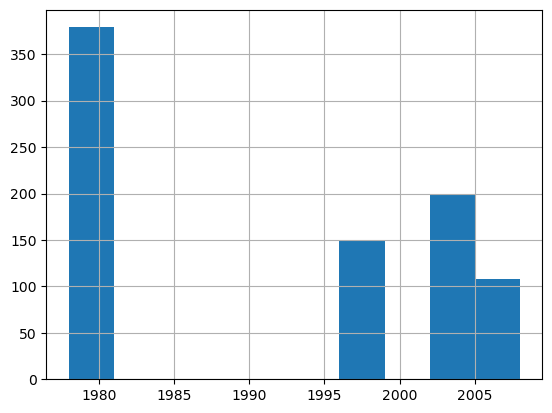

In [141]:
df['Year'].hist()